## Let's make a maze!

In [1]:
%matplotlib inline
import math, numpy as np, matplotlib.pyplot as plt

class Maze():
    def __init__(self,size=10,fill=0.1):
        self.size = size
        self.board = np.zeros([size,size])
        for row in self.board:
            for i,item in enumerate(row):
                row[i] = np.random.random() < fill #1 designates filled, 0 is empty
    def view(self):
        print(self.board)
    def find_path(self,start=(0,0),end=(-1,-1)):
        start_i,start_j = start[0] % self.size, start[1] % self.size
        end_i,end_j = end[0] % self.size, end[1] % self.size
        result = self._recurse_find_path(start_i,start_j,end_i,end_j) if self.board[start_i][start_j] == 0 and self.board[end_i][end_j] == 0 else False
        self._remove_7s()
        return result
    def _recurse_find_path(self,i,j,end_i,end_j):
        self.board[i][j] = 3 #3 designates path
        if i == end_i and j == end_j:
            return True
        options = [(i,j+1),(i+1,j),(i-1,j),(i,j-1)]
        for x,y in options:
            if self._ij_legal(x,y) and self.board[x][y] == 0:
                if self._recurse_find_path(x,y,end_i,end_j):
                    return True
        self.board[i][j] = 7 #7 designates visited
        return False
    def _ij_legal(self,i,j):
        return i == int(i) and j == int(j) and i >=0 and j >=0 and i < self.size and j < self.size
    def _remove_7s(self):
        for row in self.board:
            for i,item in enumerate(row):
                if item == 7:
                    row[i] = 0
    def clear_path(self):
        for row in self.board:
            for i,item in enumerate(row):
                if item != 1:
                    row[i] = 0  

## Okay!

Use `Maze(arg1,arg2)` to make a maze of size `arg1`x`arg1`, where each square has fill probability `arg2`.

In [2]:
x = Maze(8,0.2)
x.view()

[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  1.]]


## Path-finding
The method `find_path()` will attempt to find a path through the maze and return success or failure. If successful, the path will be populated with 3s.

In [3]:
print(x.find_path())
x.view()

False
[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  1.]]


In [4]:
x.clear_path()
x.view()

[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  1.]]


Use `find_path(start_coord,end_coord)` to find a path between specific coordinates (default is top left corner to bottom right corner).

In [5]:
print(x.find_path((2,2),(-2,-2)))
x.view()

True
[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.]
 [ 0.  0.  1.  3.  3.  3.  3.  3.]
 [ 0.  0.  0.  3.  3.  3.  1.  1.]
 [ 0.  0.  1.  3.  1.  1.  0.  0.]
 [ 1.  0.  1.  3.  3.  3.  3.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  1.]]


Careful! The path will persist on the board unless you remove it with `clear_path`.

In [6]:
x.clear_path()
x.view()
print(x.find_path((5,5),(6,7)))
x.view()

[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  1.]]
False
[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  1.]]


## Path Statistics
How likely are you to find a path from the top left corner to the bottom right corner? One can conduct an experiment and watch how path success varies with fill probability and board size.

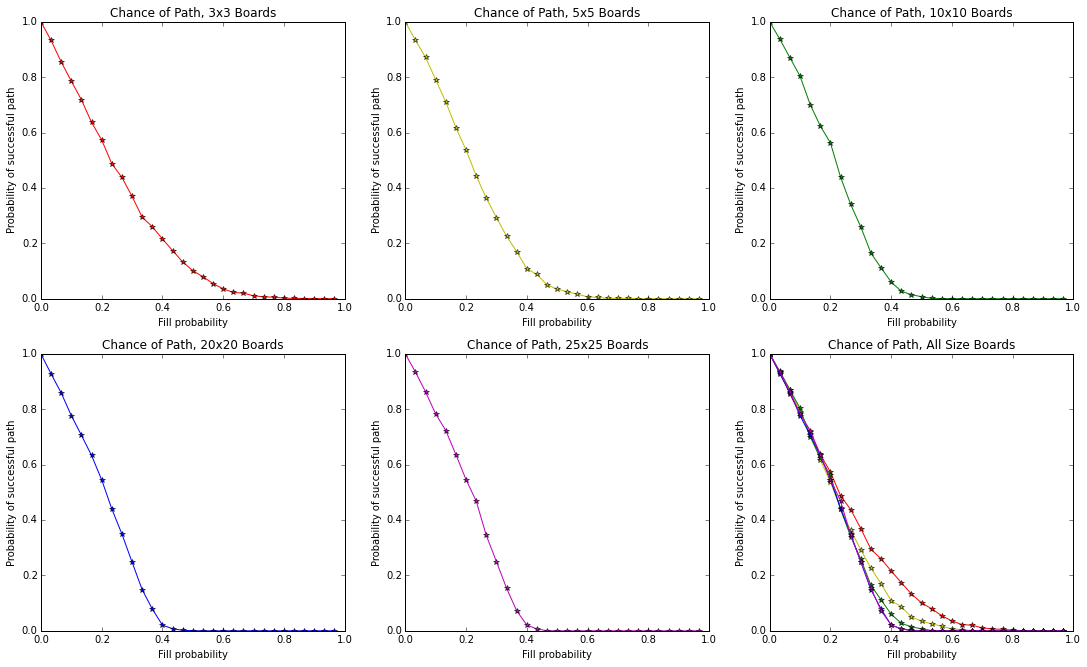

In [7]:
from __future__ import division
sizes = [3,5,10,20,25]
splits = 30
trials = 2000
averages = []
colors = ['r-*','y-*','g-*','b-*','m-*']
fig, axes = plt.subplots(figsize=(15,9))
fig.tight_layout()
for k,size in enumerate(sizes):
    averages.append([0]*splits)
    for j,fill in [(i,i/splits) for i in range(0,splits)]:
        for _ in range(trials):
            x = Maze(size,fill)
            if x.find_path():
                averages[k][j] += 1
    averages[k] = [i/trials for i in averages[k]]
    plt.subplot(231+k)
    plt.xlabel("Fill probability")
    plt.ylabel("Probability of successful path")
    plt.title("Chance of Path, " + str(sizes[k]) + "x" + str(sizes[k]) + " Boards")
    plt.plot([i/splits for i in range(0,splits)],averages[k],colors[k % len(colors)])
for k in range(len(averages)):
    plt.subplot(236)
    plt.xlabel("Fill probability")
    plt.ylabel("Probability of successful path")
    plt.title("Chance of Path, All Size Boards")
    plt.plot([i/splits for i in range(0,splits)],averages[k],colors[k % len(colors)])

## Approximations
Here I've tried to approximate the plots shown above with different curves. It seems like the path probability generally varies linearly with fill probability. When the path chance is near zero, smaller-size boards have better luck. 

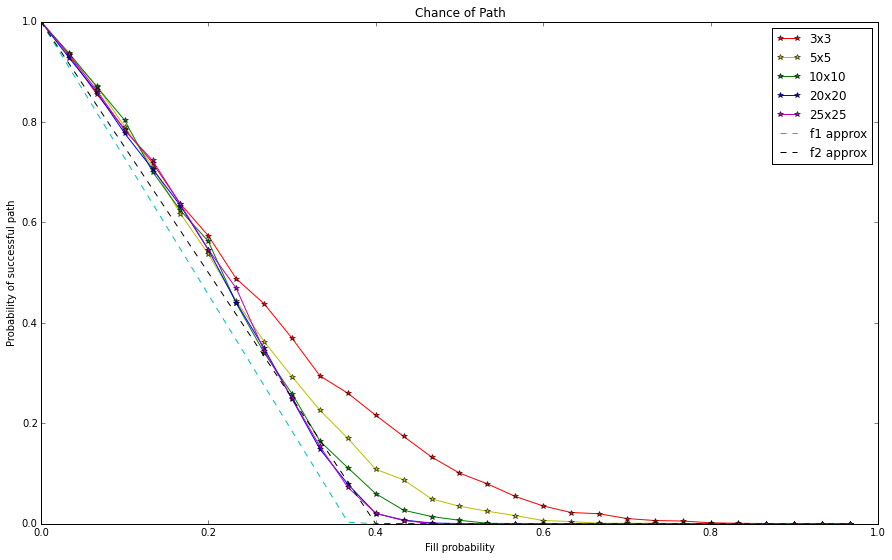

In [8]:
def f1(x):
    y = 1 - x/(splits*math.exp(-1)) #e^-1 is roughly 0.36787944117144233
    return max(y,0)
def f2(x):
    y = 1 - x/(splits*0.4)
    return max(y,0)

fig = plt.figure(figsize=(15,9))
for k in range(len(averages)):
    plt.plot([i/splits for i in range(0,splits)],averages[k],colors[k % len(colors)])
plt.plot([i/splits for i in range(0,splits)],[f1(x) for x in range(0,splits)], 'c--')
plt.plot([i/splits for i in range(0,splits)],[f2(x) for x in range(0,splits)], 'k--')
plt.xlabel("Fill probability")
plt.ylabel("Probability of successful path")
plt.title("Chance of Path")
legend = [str(size) + "x" + str(size) for size in sizes]
legend.append("f1 approx")
legend.append("f2 approx")
plt.legend(legend)

## Cool!
Future work involves probability theory to predict the true chance of a path given the board size. We can validate this theoretical work with the simulations above. For now, we can make and play with the mazes. Thanks for playing!

In [9]:
x = Maze(10,0.2)
x.view()
print(x.find_path())
x.view()

[[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
True
[[ 3.  3.  3.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  3.  1.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  3.  3.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  3.  3.  3.  3.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  3.  3.  3.  3.]
 [ 1.  1.  0.  0.  1.  0.  0.  1.  0.  3.]
 [ 0.  1.  1.  0.  0.  0.  3.  3.  3.  3.]
 [ 0.  0.  0.  1.  0.  0.  3.  1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  3.  3.  3.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  3.  3.]]
